In [1]:
import numpy as np
import pandas as pd

Connecting to the database.

In [2]:
from sqlalchemy import create_engine
from sqlalchemy.engine import URL

In [3]:

import psycopg2
hostname = 'localhost'
database = 'nyfd'
user_name = 'postgres'
pwd = 'raksha' 
port_id= 5432
conn=None
cur=None


In [4]:
engine = create_engine(f'postgresql://{user_name}:{pwd}@{hostname}:{port_id}/{database}')


In [5]:
sql = "SELECT * FROM public.fdborn_raw"

In [6]:
nyr = pd.read_sql_query(sql,engine)
nyr.head()

,camis,dba,boro,building,street,zipcode,phone,CUISINE DESCRIPTION,INSPECTION DATE,action,...,GRADE DATE,RECORD DATE,INSPECTION TYPE,Community Board,Council District,Census Tract,bin,bbl,nta,location1
0,41014056.0,REYES RESTAURANT,Queens,4754,46 STREET,11377,7187529577,Latin American,2021-07-20,No violations were recorded at the time of thi...,...,None,2024-07-03,Smoke-Free Air Act / Initial Inspection,402.0,26.0,18502.0,4002051.0,4.001700e+09,QN31,"(40.74016371,-73.91930716)"
1,50131958.0,787 COFFEE,Manhattan,204,WEST 10 STREET,10014,6468526473,Coffee/Tea,2023-12-15,Violations were cited in the following area(s).,...,2023-12-15,2024-07-03,Pre-permit (Operational) / Re-inspection,102.0,3.0,7300.0,1077829.0,1.006198e+09,MN23,"(40.73408217,-74.00398358)"
2,50143599.0,EL MESON II RESTAURANT,Manhattan,3517,BROADWAY,10031,6466001696,Latin American,2024-02-29,Violations were cited in the following area(s).,...,None,2024-07-03,Pre-permit (Operational) / Initial Inspection,109.0,7.0,22900.0,1062369.0,1.020910e+09,MN04,"(40.82585628,-73.95087348)"
3,50154371.0,NORMS PIZZA,Manhattan,8,CORTLANDT STREET,10007,2122391117,None,1900-01-01,None,...,None,2024-07-03,None,101.0,1.0,1300.0,1001079.0,1.000630e+09,MN25,"(40.70998821,-74.01038816)"
4,50150779.0,SOMEDAYS BAKERY,Queens,2337,30TH AVE,11102,9177676656,None,1900-01-01,None,...,None,2024-07-03,None,401.0,22.0,7100.0,4006266.0,4.005480e+09,QN71,"(40.76900736,-73.92590042)"


In [7]:
sql2 = "SELECT * FROM public.last_inspec"
lat_ins = pd.read_sql_query(sql2,engine)
lat_ins.head()

,facility,address,LAST INSPECTED,violations,TOTAL # CRITICAL VIOLATIONS,TOTAL #CRIT. NOT CORRECTED,TOTAL # NONCRITICAL VIOLATIONS,description,LOCAL HEALTH DEPARTMENT,county,...,PERMIT EXPIRATION DATE,PERMITTED (D/B/A),PERMITTED CORP. NAME,PERM. OPERATOR LAST NAME,PERM. OPERATOR FIRST NAME,NYS HEALTH OPERATION ID,INSPECTION TYPE,INSPECTION COMMENTS,FOOD SERVICE FACILITY STATE,location1
0,SHAKER MIDDLE SCHOOL,"475 WATERVLIET SHAKER ROAD, LATHAM",5/3/2024,No violations found.,0.0,0.0,0.0,Food Service Establishment - Food Service Esta...,Albany County,ALBANY,...,8/31/2024,None,NORTH COLONIE CENTRAL SCHOOL DISTRICT,OSTROWSKI,LISA,252261.0,Inspection,Excellent compliance.|No violations observed.|...,NY,"(42.733419,-73.751779)"
1,VESTAL SR HIGH SCHOOL CAFETERIA,"200 WOODLAWN DRIVE, VESTAL",9/19/2023,"Item 15A- Floors, walls, ceilings, not smoot...",0.0,0.0,1.0,Institutional Food Service - School K-12 Food ...,Broome County,BROOME,...,8/31/2024,None,VESTAL SCHOOL DISTRICT,POLOVCHAK,ERIN,256767.0,Inspection,None,NY,"(42.084913,-76.053352)"
2,TOWN OF CONKLIN FAIR COMMITTEE,"VARIOUS LOCATIONS, CONKLIN",7/13/2023,No violations found.,0.0,0.0,0.0,Food Service Establishment - Food Service Esta...,Broome County,BROOME,...,3/31/2025,None,CONKLIN FAIR COMMITTEE,PLATT,WILLIS,516388.0,Inspection,None,NY,"(42.07092,-75.81516)"
3,VESTAL CENTER SOCIAL CLUB,"2409 NYS ROUTE 26, VESTAL",2/1/2023,No violations found.,0.0,0.0,0.0,Food Service Establishment - Food Service Esta...,Broome County,BROOME,...,5/31/2025,None,"VESTAL CENTER SOCIAL CLUB, INC.",HEATHERMAN,JANET,256386.0,Inspection,Inspection done outside normal hours of operat...,NY,"(42.086746,-76.042282)"
4,OFA-JOHNSON CITY SR COMM CTR,"30 BROCTON STREET, JOHNSON CITY",2/26/2024,Item 8E- Accurate thermometers not availabl...,0.0,0.0,3.0,SOFA Food Service - SOFA Satellite Site -State...,Broome County,BROOME,...,3/31/2025,None,BROOME COUNTY OFFICE FOR THE AGING,FLUHARTY,RITA,256459.0,Inspection,None,NY,"(42.118509,-75.955037)"


In [101]:
comb  = pd.merge(nyr,lat_ins,left_on=['location1'],right_on=['location1'],how='left')
comb.head()

,camis,dba,boro,building,street,zipcode,phone,CUISINE DESCRIPTION,INSPECTION DATE,action,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,score,grade,GRADE DATE,RECORD DATE,INSPECTION TYPE_x,Community Board,Council District,Census Tract,bin,bbl,nta,location1,facility,address,LAST INSPECTED,violations,TOTAL # CRITICAL VIOLATIONS,TOTAL #CRIT. NOT CORRECTED,TOTAL # NONCRITICAL VIOLATIONS,description,LOCAL HEALTH DEPARTMENT,county,FACILITY ADDRESS,city,ZIP CODE,NYSDOH GAZETTEER (1980),municipality,OPERATION NAME,PERMIT EXPIRATION DATE,PERMITTED (D/B/A),PERMITTED CORP. NAME,PERM. OPERATOR LAST NAME,PERM. OPERATOR FIRST NAME,NYS HEALTH OPERATION ID,INSPECTION TYPE_y,INSPECTION COMMENTS,FOOD SERVICE FACILITY STATE
0,41014056.0,REYES RESTAURANT,Queens,4754,46 STREET,11377,7187529577,Latin American,2021-07-20,No violations were recorded at the time of this inspection.,None,None,Not Applicable,NaN,None,None,2024-07-03,Smoke-Free Air Act / Initial Inspection,402.0,26.0,18502.0,4002051.0,4.001700e+09,QN31,"(40.74016371,-73.91930716)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50131958.0,787 COFFEE,Manhattan,204,WEST 10 STREET,10014,6468526473,Coffee/Tea,2023-12-15,Violations were cited in the following area(s).,04A,Food Protection Certificate (FPC) not held by manager or supervisor of food operations.,Critical,28.0,C,2023-12-15,2024-07-03,Pre-permit (Operational) / Re-inspection,102.0,3.0,7300.0,1077829.0,1.006198e+09,MN23,"(40.73408217,-74.00398358)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,50143599.0,EL MESON II RESTAURANT,Manhattan,3517,BROADWAY,10031,6466001696,Latin American,2024-02-29,Violations were cited in the following area(s).,04M,Live roaches in facility's food or non-food area.,Critical,33.0,None,None,2024-07-03,Pre-permit (Operational) / Initial Inspection,109.0,7.0,22900.0,1062369.0,1.020910e+09,MN04,"(40.82585628,-73.95087348)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50154371.0,NORMS PIZZA,Manhattan,8,CORTLANDT STREET,10007,2122391117,None,1900-01-01,None,None,None,Not Applicable,NaN,None,None,2024-07-03,None,101.0,1.0,1300.0,1001079.0,1.000630e+09,MN25,"(40.70998821,-74.01038816)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50150779.0,SOMEDAYS BAKERY,Queens,2337,30TH AVE,11102,9177676656,None,1900-01-01,None,None,None,Not Applicable,NaN,None,None,2024-07-03,None,401.0,22.0,7100.0,4006266.0,4.005480e+09,QN71,"(40.76900736,-73.92590042)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


null values

In [102]:
comb.isnull().sum()

camis                                 34
dba                                  823
boro                                  34
building                             662
street                                34
zipcode                             2840
phone                                 37
CUISINE DESCRIPTION                 2676
INSPECTION DATE                       34
action                              2676
VIOLATION CODE                      3975
VIOLATION DESCRIPTION               3975
CRITICAL FLAG                         34
score                              11646
grade                             121965
GRADE DATE                        130559
RECORD DATE                           34
INSPECTION TYPE_x                   2676
Community Board                     3928
Council District                    3926
Census Tract                        3926
bin                                 5096
bbl                                 1122
nta                                 3928
location1       

shape of the dataset

In [103]:
comb.shape

(236806, 50)

COLUMNS

In [104]:
comb.columns

Index(['camis', 'dba', 'boro', 'building', 'street', 'zipcode', 'phone',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'action', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'score', 'grade',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE_x', 'Community Board',
       'Council District', 'Census Tract', 'bin', 'bbl', 'nta', 'location1',
       'facility', 'address', 'LAST INSPECTED', 'violations',
       'TOTAL # CRITICAL VIOLATIONS', 'TOTAL #CRIT.  NOT CORRECTED',
       'TOTAL # NONCRITICAL VIOLATIONS', 'description',
       'LOCAL HEALTH DEPARTMENT', 'county', 'FACILITY ADDRESS', 'city',
       'ZIP CODE', 'NYSDOH GAZETTEER (1980)', 'municipality', 'OPERATION NAME',
       'PERMIT EXPIRATION DATE', 'PERMITTED  (D/B/A)', 'PERMITTED  CORP. NAME',
       'PERM. OPERATOR LAST NAME', 'PERM. OPERATOR FIRST NAME',
       'NYS HEALTH OPERATION ID', 'INSPECTION TYPE_y', 'INSPECTION COMMENTS',
       'FOOD SERVICE FACILITY STATE'],
      dtype='object')

COLUMNS INFO

In [105]:
comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236806 entries, 0 to 236805
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   camis                           236772 non-null  float64
 1   dba                             235983 non-null  object 
 2   boro                            236772 non-null  object 
 3   building                        236144 non-null  object 
 4   street                          236772 non-null  object 
 5   zipcode                         233966 non-null  object 
 6   phone                           236769 non-null  object 
 7   CUISINE DESCRIPTION             234130 non-null  object 
 8   INSPECTION DATE                 236772 non-null  object 
 9   action                          234130 non-null  object 
 10  VIOLATION CODE                  232831 non-null  object 
 11  VIOLATION DESCRIPTION           232831 non-null  object 
 12  CRITICAL FLAG   

column stats

In [106]:
comb.describe()

,camis,score,Community Board,Council District,Census Tract,bin,bbl,TOTAL # CRITICAL VIOLATIONS,TOTAL #CRIT. NOT CORRECTED,TOTAL # NONCRITICAL VIOLATIONS,NYSDOH GAZETTEER (1980),NYS HEALTH OPERATION ID
count,2.367720e+05,225160.000000,232878.000000,232880.000000,232880.000000,2.317100e+05,2.356840e+05,0.0,0.0,0.0,0.0,0.0
mean,4.764287e+07,23.434833,254.988732,20.922947,29948.569731,2.581403e+06,2.471631e+09,NaN,NaN,NaN,NaN,NaN
std,3.988368e+06,17.767134,130.007465,15.881194,31500.105766,1.346787e+06,1.336318e+09,NaN,NaN,NaN,NaN,NaN
min,3.007544e+07,0.000000,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,4.166705e+07,11.000000,106.000000,4.000000,7900.000000,1.051583e+06,1.010990e+09,NaN,NaN,NaN,NaN,NaN
50%,5.007258e+07,20.000000,302.000000,20.000000,17200.000000,3.021815e+06,3.008010e+09,NaN,NaN,NaN,NaN,NaN
75%,5.011119e+07,31.000000,401.000000,35.000000,42500.000000,4.007748e+06,4.004711e+09,NaN,NaN,NaN,NaN,NaN
max,5.015483e+07,168.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09,NaN,NaN,NaN,NaN,NaN


Duplicated values

In [107]:
comb.duplicated(keep=False).sum()

np.int64(748)

unique values in each column

In [108]:
comb.nunique()

camis                             28901
dba                               22397
boro                                  6
building                           7612
street                             2404
zipcode                             227
phone                             26038
CUISINE DESCRIPTION                  89
INSPECTION DATE                    1734
action                                5
VIOLATION CODE                      143
VIOLATION DESCRIPTION               220
CRITICAL FLAG                         3
score                               131
grade                                 6
GRADE DATE                         1503
RECORD DATE                           1
INSPECTION TYPE_x                    32
Community Board                      69
Council District                     51
Census Tract                       1179
bin                               20279
bbl                               19986
nta                                 193
location1                         23463


EDA THROUGH AUTOVIZ

In [109]:
from autoviz import AutoViz_Class
AV = AutoViz_Class()


In [110]:
import bokeh
import autoviz
import holoviews

print(f"Bokeh version: {bokeh.__version__}")
print(f"AutoViz version: {autoviz.__version__}")
print(f"HoloViews version: {holoviews.__version__}")

Bokeh version: 3.4.2
AutoViz version: 0.1.905
HoloViews version: 1.19.1


In [111]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

Shape of your Data Set loaded: (236806, 50)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  7
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  6
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  4
    Number of NLP String Columns =  6
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  26
    49 Predictors classified...
        26 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['RECORD DATE', 'facility', 'address', 'LAST INSPECTED', 'violat

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
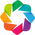

BokehModel(combine_events=True, render_bundle={'docs_json': {'fb4c2cb7-4f04-4912-aaf6-df3ee8bb4fde': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'b941aa34-3558-48d2-8757-dcd399efb31e': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'78b94138-e908-4073-8924-02195e15ff39': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'6a73ed45-3385-4f9d-b65d-c12f01436ef8': {'version…

KDE plot is erroring due to problems with DynamicMaps. Hence it is skipped


TypeError: '<' not supported between instances of 'str' and 'NoneType'

In [112]:
custom_plot_dir = "vcx"
dft = AV.AutoViz(
    "",
    sep=",",
    depVar="CRITICAL FLAG",
    dfte=comb,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="bokeh",
    max_rows_analyzed=250000,
    max_cols_analyzed=30,
    save_plot_dir= custom_plot_dir,
)

In [ ]:
comb['GRADE DATE'] = pd.to_datetime(comb['GRADE DATE'])
comb['INSPECTION DATE'] = pd.to_datetime(comb['INSPECTION DATE'])
comb['PERMIT EXPIRATION DATE'] = pd.to_datetime(comb['PERMIT EXPIRATION DATE'])
comb['RECORD DATE'] = pd.to_datetime(comb['RECORD DATE'])

pandas profiler

In [ ]:
from ydata_profiling import ProfileReport
prof = ProfileReport(comb)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print(comb['TOTAL # NONCRITICAL VIOLATIONS'].isnull().sum(),comb.shape)


236806 (236806, 50)


In [116]:
nyr['RECORD DATE'].value_counts()

RECORD DATE
2024-07-03    236421
Name: count, dtype: int64

In [120]:
nyr['GRADE DATE'].value_counts()

GRADE DATE
2024-03-21    363
2024-03-14    357
2022-12-01    320
2023-02-27    317
2024-03-07    317
             ... 
2024-05-18      1
2016-04-26      1
2022-11-26      1
2016-05-10      1
2017-01-26      1
Name: count, Length: 1503, dtype: int64

In [121]:
nyr['INSPECTION DATE'].value_counts()

INSPECTION DATE
1900-01-01    2587
2024-06-25     585
2024-06-27     584
2024-06-13     579
2024-05-23     569
              ... 
2017-01-17       1
2017-03-15       1
2015-10-15       1
2021-02-23       1
2016-05-28       1
Name: count, Length: 1734, dtype: int64

In [119]:
lat_ins['LAST INSPECTED'].value_counts()

LAST INSPECTED
2/27/2024     135
3/21/2024     131
1/24/2024     130
2/7/2024      125
3/27/2024     124
             ... 
3/11/2021       1
9/17/2022       1
10/24/2014      1
2/24/2022       1
9/2/2008        1
Name: count, Length: 1350, dtype: int64

In [128]:
for x in nyr['location1']:
    row_similarities = []
    for y in lat_ins['location1']:
        if x is not None and y is not None:
            similarity = SequenceMatcher(None, x, y).ratio()
            row_similarities.append(similarity)
        else:
            row_similarities.append(0)  # or some other default value
    similarities.append(row_similarities)

KeyboardInterrupt: 